<a href="https://colab.research.google.com/github/mistykz/pengenalan-pola-pso/blob/main/PSO_SVM_Arthya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score

digits = datasets.load_digits()

X = digits.images.reshape((len(digits.images), -1))
y = digits.target

X = X/16

In [ ]:
X_tmp = []
y_tmp = []
for label in range(10):
    if label==0 or label==9:
        indeks = np.where(y == label)[0]
        sel_indeks = indeks[:12]
        X_tmp.extend(X[sel_indeks])
        y_tmp.extend(y[sel_indeks])
    else:
        indeks = np.where(y == label)[0]
        sel_indeks = indeks[:120]
        X_tmp.extend(X[sel_indeks])
        y_tmp.extend(y[sel_indeks])

X_train = np.array(X_tmp)
y_train = np.array(y_tmp)

print("shape data training:", X_train.shape)
print("label data training:", y_train.shape)

shape data training: (984, 64)
label data training: (984,)


In [ ]:
X_tmp = []
y_tmp = []
for label in range(10):
    indeks = np.where(y == label)[0]
    sel_indeks = indeks[-40:]
    X_tmp.extend(X[sel_indeks])
    y_tmp.extend(y[sel_indeks])


X_test = np.array(X_tmp)
y_test = np.array(y_tmp)

print("shape data uji :", X_test.shape)
print("jumlah indeks :", y_test.shape)

shape data uji : (400, 64)
jumlah indeks : (400,)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
def evaluasi_SVM(C, gamma):
    svm_model = SVC(C=C, gamma=gamma)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    akurasi = accuracy_score(y_test, y_pred)
    return akurasi

In [ ]:
def PSO(func, bounds, n_partikel, n_iterasi):
    partikel = np.random.uniform(bounds[:, 0], bounds[:, 1], (n_partikel, bounds.shape[0]))
    kecepatan = np.zeros_like(partikel)
    posisi_pbest = partikel.copy()
    score_pbest = np.zeros(n_partikel)
    posisi_gbest = None
    score_gbest = float('-inf')
    iterasi_score = []

    for _ in range(n_iterasi):
        for i in range(n_partikel):
            score = func(partikel[i, 0], partikel[i, 1])

            if score > score_pbest[i]:
                score_pbest[i] = score
                posisi_pbest[i] = partikel[i]

            if score > score_gbest:
                score_gbest = score
                posisi_gbest = partikel[i]

            # Update kecepatan partikel
            #r1 = np.random.rand(bounds.shape[0])
            #r2 = np.random.rand(bounds.shape[0])
            r1 = 0.5
            r2 = 0.5
            kecepatan[i] = kecepatan[i] + 1 * r1 * (posisi_pbest[i] - partikel[i]) + 1 * r2 * (posisi_gbest - partikel[i])

            kecepatan[i] = np.clip(kecepatan[i], -abs(bounds[:, 1] - bounds[:, 0]), abs(bounds[:, 1] - bounds[:, 0]))

            # Update posisi partikel
            partikel[i] = partikel[i] + kecepatan[i]
            partikel[i] = np.clip(partikel[i], bounds[:, 0], bounds[:, 1])

        iterasi_score.append(score_gbest)

    return posisi_gbest, score_gbest, iterasi_score

Parameter terbaik (C, gamma): [9.74661544e+01 1.00000000e-03]
Akurasi : 92.5


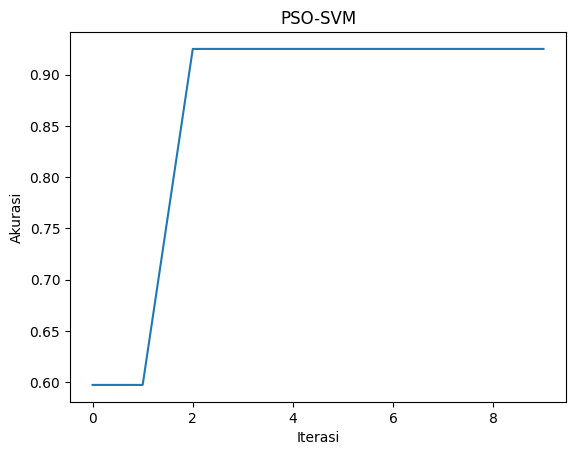

In [ ]:
bounds = np.array([[0.1, 100], [0.001, 10]])

particles = 20
iterations = 10

nilai_terbaik, akurasi_terbaik, nilai_iterasi = PSO(evaluasi_SVM, bounds, particles, iterations)

print("Parameter terbaik (C, gamma):", nilai_terbaik)
print("Akurasi :", akurasi_terbaik*100)

plt.plot(nilai_iterasi)
plt.xlabel("Iterasi")
plt.ylabel("Akurasi")
plt.title("PSO-SVM")
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.92      0.90      0.91        40
           2       1.00      1.00      1.00        40
           3       0.94      0.72      0.82        40
           4       0.95      0.93      0.94        40
           5       0.87      1.00      0.93        40
           6       1.00      0.97      0.99        40
           7       0.79      0.95      0.86        40
           8       0.82      0.93      0.87        40
           9       0.79      0.68      0.73        40

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.90       400
weighted avg       0.91      0.91      0.90       400



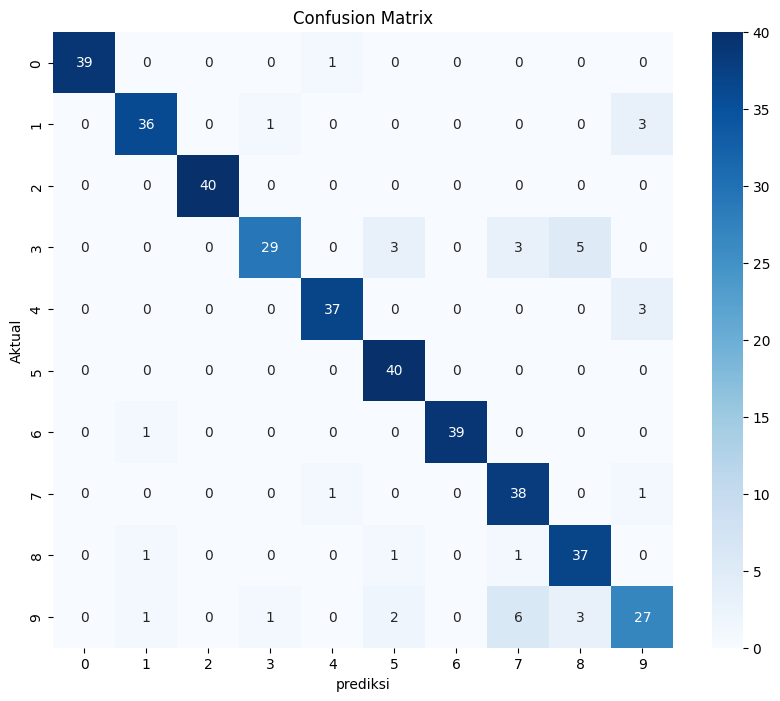

In [ ]:
svm_model = SVC(C=nilai_terbaik[0], gamma=nilai_terbaik[1])

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("Classification Report:")
print(metrics.classification_report(y_test, y_pred))

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

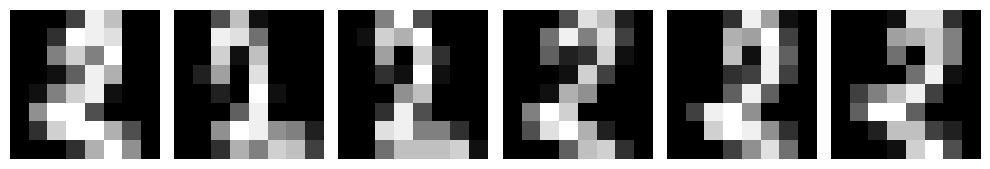

Indices of images with label 2 :
[   2   12   22   50   51   54   57   75   77   84  113  115  116  132
  142  152  180  181  184  187  205  207  214  241  243  244  258  268
  278  306  307  310  313  331  333  340  369  371  372  388  398  408
  436  437  440  443  461  463  470  499  501  502  518  528  538  566
  567  570  573  591  593  600  629  631  632  648  658  668  696  697
  700  703  721  723  730  759  761  762  778  788  798  826  827  830
  833  851  853  860  889  891  892  907  917  927  953  956  959  977
  979  986 1014 1016 1017 1031 1041 1051 1081 1084 1102 1104 1111 1140
 1142 1143 1159 1169 1179 1207 1208 1211 1214 1232 1234 1241 1270 1272
 1273 1289 1299 1309 1337 1338 1341 1344 1362 1364 1371 1400 1402 1403
 1417 1427 1437 1465 1466 1469 1472 1490 1492 1499 1528 1530 1531 1547
 1557 1565 1593 1594 1597 1600 1618 1625 1654 1655 1669 1679 1689 1717
 1718 1721 1724 1742 1744 1751 1780 1782 1783]


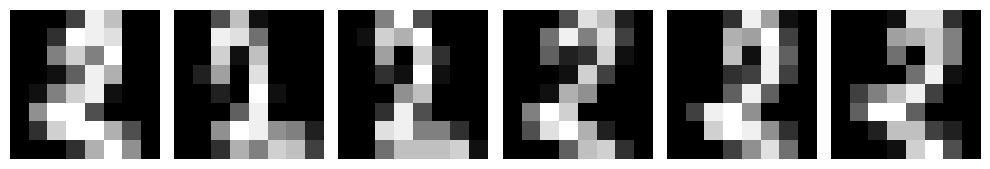

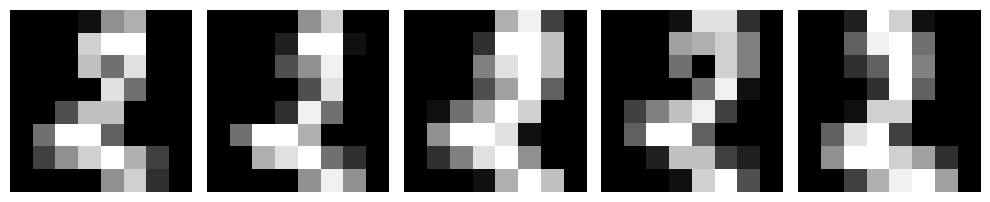

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
 
0.0
0.0
0.0
0.0
0.25
0.375
0.0
0.0
 
0.0
0.0
0.0
0.0
0.5
1.0
0.125
0.0
 
0.0625
0.625
0.4375
0.0
0.75
1.0
0.75
0.0625
 
0.875
0.6875
0.0
0.4375
0.9375
0.375
0.75
0.8125
 
0.875
0.8125
0.8125
0.9375
0.25
0.0
0.25
1.0
 
0.1875
0.5
0.5
0.0625
0.0
0.0
0.125
0.3125
 
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
 


In [ ]:
label = 2
label_indices = [i for i in range(len(y)) if y[i] == label]

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 5))

for i, ax in enumerate(axes):
    image = X[label_indices[i]].reshape(8, 8)
    ax.imshow(image, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()


label_indices = np.where(y == label)[0]

print("Indices of images with label", label, ":")
print(label_indices)

label = 2
label_indices = [i for i in range(len(y)) if y[i] == label]

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 5))

for i, ax in enumerate(axes):
    image = X[label_indices[i]].reshape(8, 8)
    ax.imshow(image, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 5))

indeksP = [70,56,85,80,93]
indeksN = [57,75,77,54,113]

for i, ax in enumerate(axes):
    image = X[indeksN[i]].reshape(8, 8)
    ax.imshow(image, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()


count=0
count2=0
tmp=count+count2

for i in range(8):
    for j in range(8):
        print(X[54][tmp])
        tmp+=8
    tmp=0
    count+=1
    tmp=count+count2
    print(" ")

[[0.     0.     0.3125 ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.625  0.     0.    ]
 [0.     0.     0.     ... 1.     0.5625 0.    ]
 ...
 [0.     0.     0.0625 ... 0.375  0.     0.    ]
 [0.     0.     0.125  ... 0.75   0.     0.    ]
 [0.     0.     0.625  ... 0.75   0.0625 0.    ]]
[0 1 2 ... 8 9 8]
0 2
Akurasi : 92.25


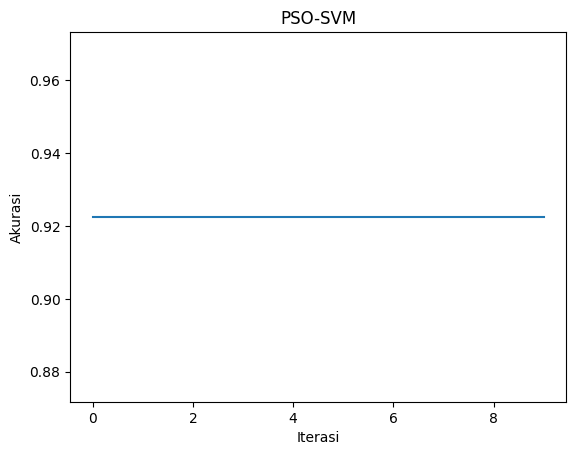

[[0.     0.     0.3125 ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.625  0.     0.    ]
 [0.     0.     0.     ... 1.     0.5625 0.    ]
 ...
 [0.     0.     0.0625 ... 0.375  0.     0.    ]
 [0.     0.     0.125  ... 0.75   0.     0.    ]
 [0.     0.     0.625  ... 0.75   0.0625 0.    ]]
[0 1 2 ... 8 9 8]
1 3
Akurasi : 88.5


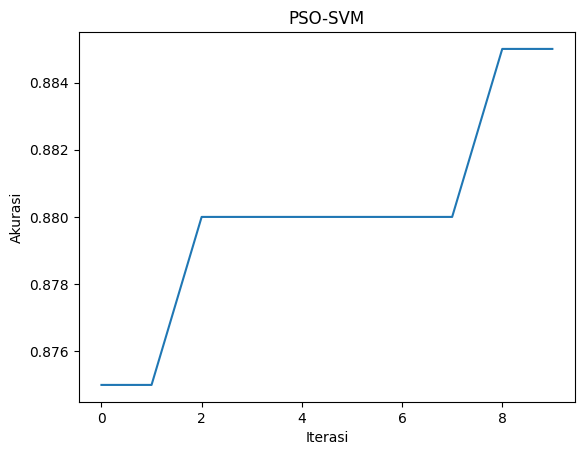

[[0.     0.     0.3125 ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.625  0.     0.    ]
 [0.     0.     0.     ... 1.     0.5625 0.    ]
 ...
 [0.     0.     0.0625 ... 0.375  0.     0.    ]
 [0.     0.     0.125  ... 0.75   0.     0.    ]
 [0.     0.     0.625  ... 0.75   0.0625 0.    ]]
[0 1 2 ... 8 9 8]
2 4
Akurasi : 90.5


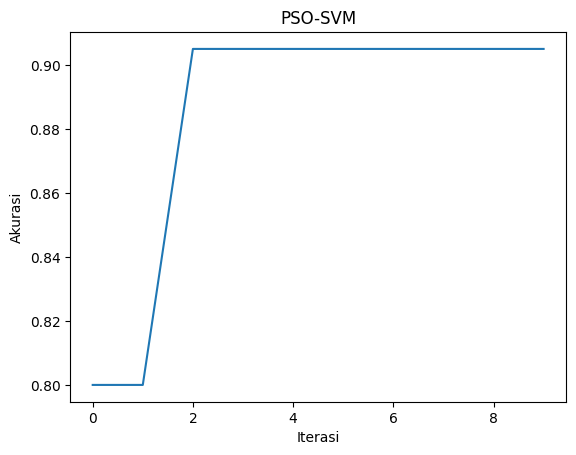

[[0.     0.     0.3125 ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.625  0.     0.    ]
 [0.     0.     0.     ... 1.     0.5625 0.    ]
 ...
 [0.     0.     0.0625 ... 0.375  0.     0.    ]
 [0.     0.     0.125  ... 0.75   0.     0.    ]
 [0.     0.     0.625  ... 0.75   0.0625 0.    ]]
[0 1 2 ... 8 9 8]
3 5
Akurasi : 89.75


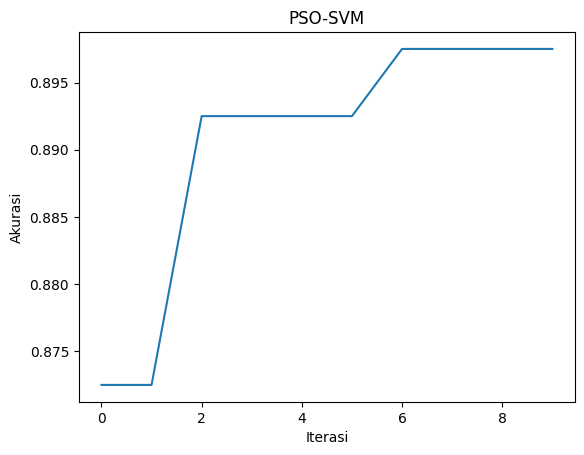

[[0.     0.     0.3125 ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.625  0.     0.    ]
 [0.     0.     0.     ... 1.     0.5625 0.    ]
 ...
 [0.     0.     0.0625 ... 0.375  0.     0.    ]
 [0.     0.     0.125  ... 0.75   0.     0.    ]
 [0.     0.     0.625  ... 0.75   0.0625 0.    ]]
[0 1 2 ... 8 9 8]
4 6
Akurasi : 94.75


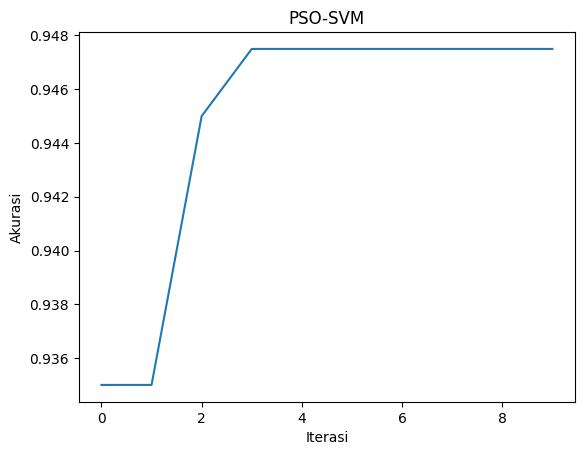

[[0.     0.     0.3125 ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.625  0.     0.    ]
 [0.     0.     0.     ... 1.     0.5625 0.    ]
 ...
 [0.     0.     0.0625 ... 0.375  0.     0.    ]
 [0.     0.     0.125  ... 0.75   0.     0.    ]
 [0.     0.     0.625  ... 0.75   0.0625 0.    ]]
[0 1 2 ... 8 9 8]
5 7
Akurasi : 88.75


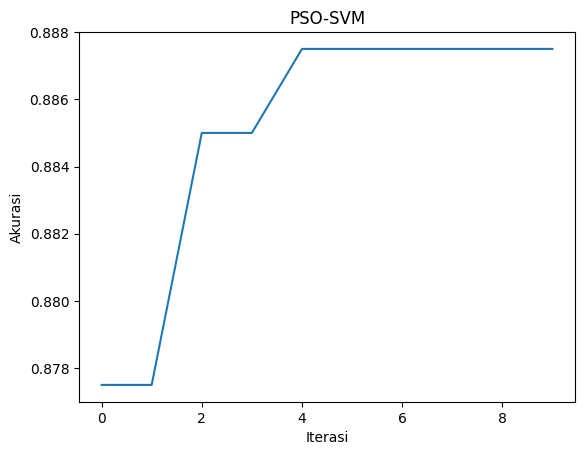

[[0.     0.     0.3125 ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.625  0.     0.    ]
 [0.     0.     0.     ... 1.     0.5625 0.    ]
 ...
 [0.     0.     0.0625 ... 0.375  0.     0.    ]
 [0.     0.     0.125  ... 0.75   0.     0.    ]
 [0.     0.     0.625  ... 0.75   0.0625 0.    ]]
[0 1 2 ... 8 9 8]
6 8
Akurasi : 91.5


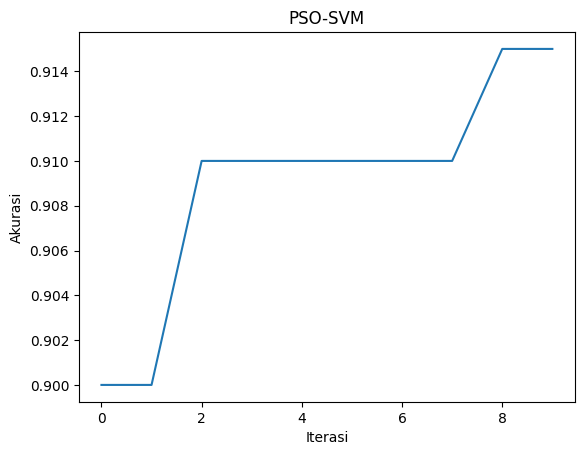

[[0.     0.     0.3125 ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.625  0.     0.    ]
 [0.     0.     0.     ... 1.     0.5625 0.    ]
 ...
 [0.     0.     0.0625 ... 0.375  0.     0.    ]
 [0.     0.     0.125  ... 0.75   0.     0.    ]
 [0.     0.     0.625  ... 0.75   0.0625 0.    ]]
[0 1 2 ... 8 9 8]
7 9
Akurasi : 90.0


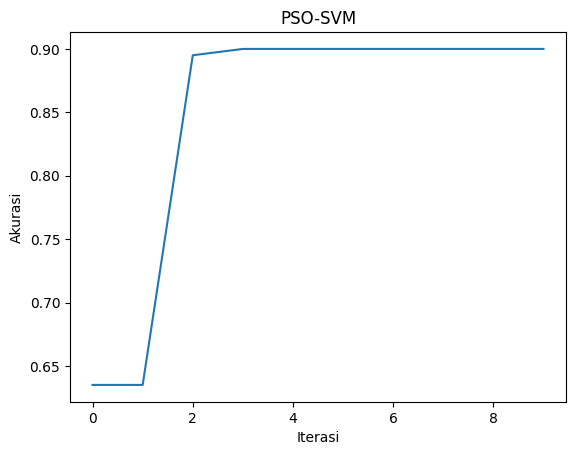

[[0.     0.     0.3125 ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.625  0.     0.    ]
 [0.     0.     0.     ... 1.     0.5625 0.    ]
 ...
 [0.     0.     0.0625 ... 0.375  0.     0.    ]
 [0.     0.     0.125  ... 0.75   0.     0.    ]
 [0.     0.     0.625  ... 0.75   0.0625 0.    ]]
[0 1 2 ... 8 9 8]
0 9
Akurasi : 92.75


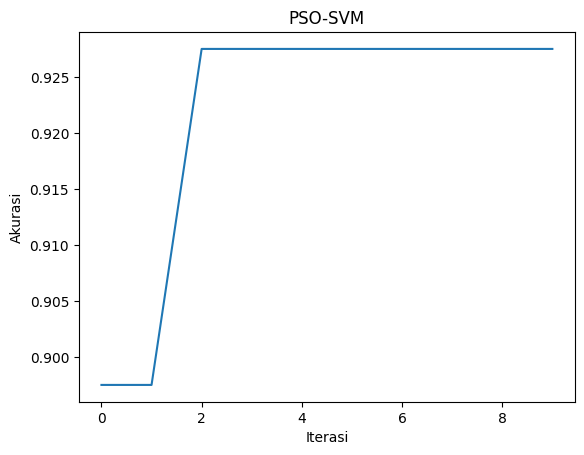

[[0.     0.     0.3125 ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.625  0.     0.    ]
 [0.     0.     0.     ... 1.     0.5625 0.    ]
 ...
 [0.     0.     0.0625 ... 0.375  0.     0.    ]
 [0.     0.     0.125  ... 0.75   0.     0.    ]
 [0.     0.     0.625  ... 0.75   0.0625 0.    ]]
[0 1 2 ... 8 9 8]
1 8
Akurasi : 87.0


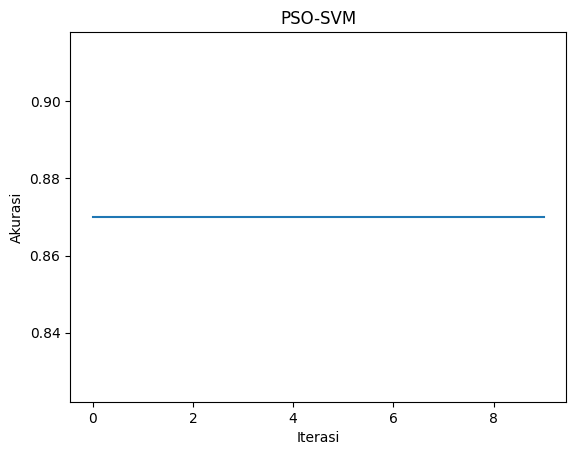

In [ ]:
indeks0 = [0,1,2,3,4,5,6,7,0,1]
indeks1 = [2,3,4,5,6,7,8,9,9,8]
for i in range(10):
    digits = datasets.load_digits()

    X = digits.images.reshape((len(digits.images), -1))
    y = digits.target

    X = X/16

    print(X)
    print

    X_tmp = []
    y_tmp = []
    for label in range(10):
        if label==indeks0[i] or label==indeks1[i]:
            indeks = np.where(y == label)[0]
            sel_indeks = indeks[:12]
            X_tmp.extend(X[sel_indeks])
            y_tmp.extend(y[sel_indeks])
        else:
            indeks = np.where(y == label)[0]
            sel_indeks = indeks[:120]
            X_tmp.extend(X[sel_indeks])
            y_tmp.extend(y[sel_indeks])

    X_train = np.array(X_tmp)
    y_train = np.array(y_tmp)

    X_tmp = []
    y_tmp = []
    for label in range(10):
        indeks = np.where(y == label)[0]
        sel_indeks = indeks[-40:]
        X_tmp.extend(X[sel_indeks])
        y_tmp.extend(y[sel_indeks])

    X_test = np.array(X_tmp)
    y_test = np.array(y_tmp)

    smote = SMOTE()
    X_train, y_train = smote.fit_resample(X_train, y_train)

    bounds = np.array([[0.1, 100], [0.001, 10]])

    particles = 20
    iterations = 10

    nilai_terbaik, akurasi_terbaik, nilai_iterasi = PSO(evaluasi_SVM, bounds, particles, iterations)

    print(indeks0[i],indeks1[i])
    print("Akurasi :", akurasi_terbaik*100)

    plt.plot(nilai_iterasi)
    plt.xlabel("Iterasi")
    plt.ylabel("Akurasi")
    plt.title("PSO-SVM")
    plt.show()

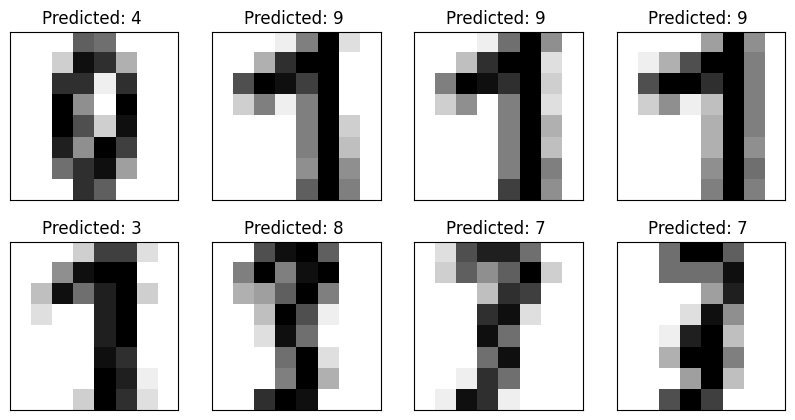

In [ ]:
# menampilkan sampel yang gagal atau tidak cocok
missed = X_test[y_pred != y_test][:100]
missed_labels = y_pred[y_pred != y_test][:100]
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 5),
                         subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(missed[i].reshape(8, 8), cmap=plt.cm.gray_r)
    ax.set_title('Predicted: {} '.format(missed_labels[i]))
plt.show()

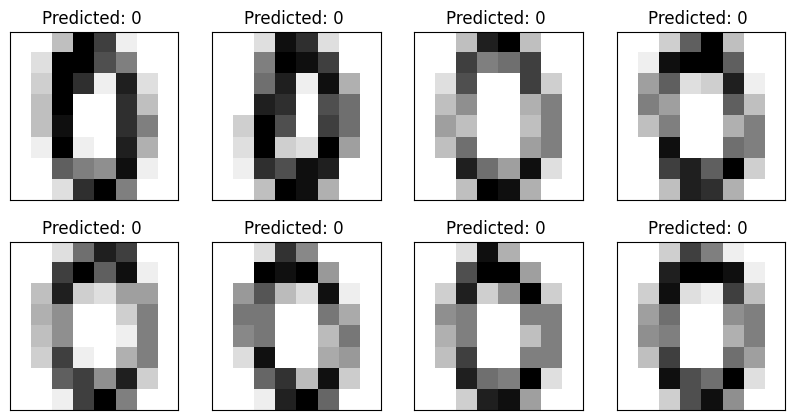

In [ ]:
# menampilkan sampel yang sukses atau cocok
cocok = X_test[y_pred == y_test][:100]
cocok_labels = y_pred[y_pred == y_test][:100]
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 5),
                         subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(cocok[i].reshape(8, 8), cmap=plt.cm.gray_r)
    ax.set_title('Predicted: {} '.format(cocok_labels[i]))
plt.show()